In [3]:
pip install pandas numpy scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def preprocess_data(df):
    df = df.dropna()  
    df = df.select_dtypes(include=[np.number])  
    return df

df1 = pd.read_csv('modified.csv', encoding="utf-8")
df2 = pd.read_csv('modified_1.csv', encoding="utf-8")

df1 = preprocess_data(df1)
df2 = preprocess_data(df2)

df = pd.concat([df1, df2])  

X = df.drop(columns=['id'], errors='ignore')  
y = df['bus_stop_id'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred) * 100  # В процентах

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Accuracy (R²): {r2:.2f}%")


MAE: 16.68
RMSE: 39.34
Accuracy (R²): 99.88%


In [3]:
print(df1.columns)
print(df2.columns)
print(df.columns)

Index(['bus_stop_id', 'bus_id', 'enter_sum', 'exit_sum', 'route_number',
       'tickets_count', 'id'],
      dtype='object')
Index(['id', 'bus_stop_id', 'bus_id', 'enter_sum', 'exit_sum', 'route_number',
       'tickets_count'],
      dtype='object')
Index(['bus_stop_id', 'bus_id', 'enter_sum', 'exit_sum', 'route_number',
       'tickets_count', 'id'],
      dtype='object')


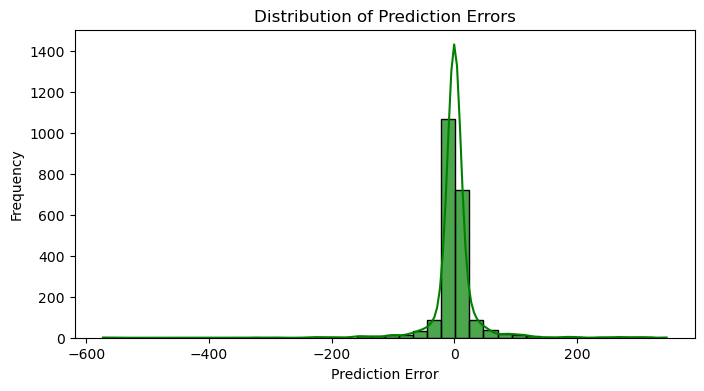

In [11]:
errors = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=40, color='green', alpha=0.7, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

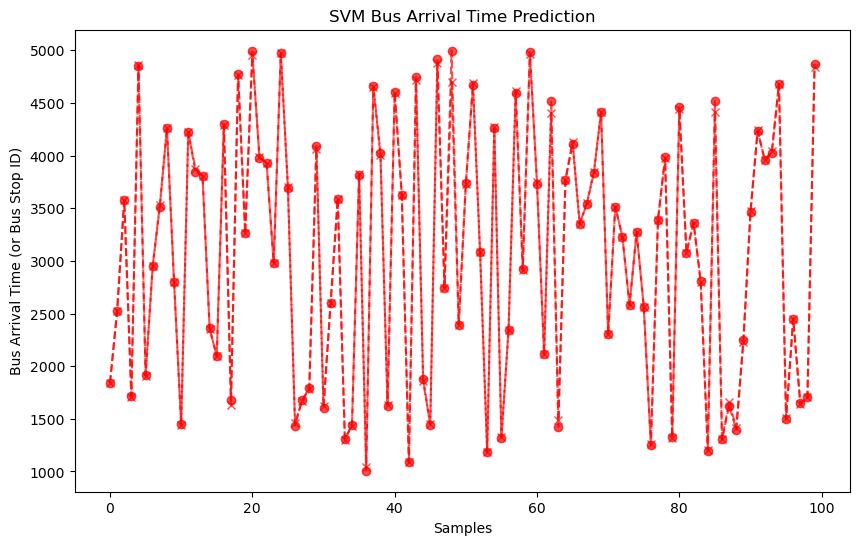

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual Values", color='red', marker='o', linestyle='dashed', alpha=0.7)
plt.plot(y_pred[:100], label="Predicted Values", color='red', marker='x', linestyle='dashed', alpha=0.7)

plt.xlabel("Samples")
plt.ylabel("Bus Arrival Time (or Bus Stop ID)")
plt.title("SVM Bus Arrival Time Prediction")
plt.show()